In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [6]:
#1.Find Linear regression equation
regr = linear_model.LinearRegression()
X= df [['Ground Temperature']]
y=df ['Chirps/Second']
regr.fit(X,y)

LinearRegression()

In [8]:
m=format(regr.coef_[0],'.2f')
c=format(regr.intercept_,'.2f')
print(m,c)

0.20 0.46


In [9]:
print('Linear Regression Equation: y = {} * x + {}'
      .format(m,c))

Linear Regression Equation: y = 0.20 * x + 0.46


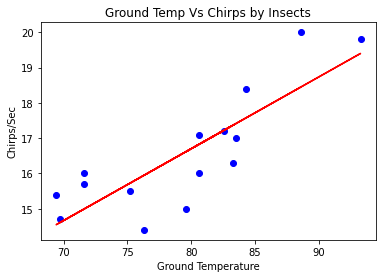

In [10]:
#2.Chart original data and equation of the chart
plt.scatter(X,y,color='b')
plt.plot(X,regr.predict(X),color='r')
plt.title('Ground Temp Vs Chirps by Insects')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Sec')
plt.show()

In [11]:
#3.Find R^2 equation
print(regr.score(X,y))

0.6922946529146998


Since it is less than 0.8 it does not have a strong correlation

In [12]:
#4.Extrapolate data
x_test = np.array([95]).reshape((-1, 1))
y_pred=regr.predict(x_test)
print('For the ground temperature 95 degrees the chirps/second is :',format(y_pred[0],'.2f'))

For the ground temperature 95 degrees the chirps/second is : 19.74


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
#5.Interpolate data
def chirps_to_temp(y):
    ret = format((y - regr.intercept_) / regr.coef_[0],'.2f')
    print('For {} chirps/second the ground temperature is {}'.format(y,ret))
chirps_to_temp(18)

For 18 chirps/second the ground temperature is 86.41


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [14]:
df = pd.read_fwf("brain_body.txt")

In [15]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [17]:
#1.Find Linear Regression equation
regr = linear_model.LinearRegression()
X = df[['Body']]
y=df['Brain']
regr.fit(X,y)

LinearRegression()

In [18]:
c=format(regr.intercept_,'.2f')
m=format(regr.coef_[0],'.2f')
print(m,c)

0.90 -56.86


In [19]:
print('Linear Regression Equation: y = {} * x + {}'
      .format(m,c))

Linear Regression Equation: y = 0.90 * x + -56.86


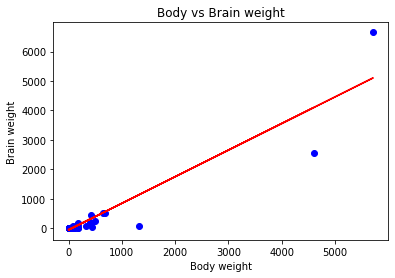

In [20]:
#2.Chart the original data and equation of the chart
plt.scatter(X,y,color='b')
plt.plot(X,regr.predict(X),color='r')
plt.title('Body vs Brain weight')
plt.xlabel('Body weight')
plt.ylabel('Brain weight')
plt.show()

In [21]:
#3.Find R^2 equation
print(regr.score(X,y))

0.8726620843043331


Good fit beacuse of score is greater than 0.8 

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [22]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [23]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [25]:
#1.Find Linear Regression equation
X= df[['Sex','Rank','Year','Degree','YSdeg']]
y=df['Salary']
X.head()

,Sex,Rank,Year,Degree,YSdeg
0,0,3,25,1,35
1,0,3,13,1,22
2,0,3,10,1,23
3,1,3,7,1,27
4,0,3,19,0,30


In [26]:
regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [29]:
m=format(regr.coef_[0],'.2f')
c=format(regr.intercept_,'.2f')
print(regr.coef_,'*  x  +',c)

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] *  x  + 11410.15


In [30]:
#2.Find selection of columns with best R^2
regr.score(X,y)

0.8547180674410969

In [32]:
features=['Sex','Rank','Year','Degree','YSdeg']
def reg_eqn(features,df,y='Salary'):
    input=df[features]
    output=df[y]
    regr=linear_model.LinearRegression()
    regr.fit(input,output)
    return regr.score(input,output)
print('R ^2 score is {}'.format(reg_eqn(features,df)))

R ^2 score is 0.8547180674410969


In [36]:
import itertools as it
def get_combination(features):
    return [it.combinations(features, n+1) for n in range (len(features))]

def all_score_combo(combo,df,y="Salary"):
    score={}
    for i in range(len(list(features))):
        for j in list(combo[i]):
            score[reg_eqn(list(j),df,y)] = j
    return score

In [37]:
combo=get_combination(features)
list1=all_score_combo(combo,df)
sorted(list1.items(),key=lambda c:c[0],reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

Year and Rank plays important role

In [38]:
#3.sex is a factor in salary?
sex_count=df.Sex.value_counts()
print('Men : {}'.format(sex_count[0]))
print('Women : {}'.format(sex_count[1]))

Men : 38
Women : 14


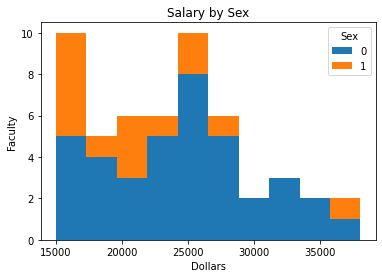

In [39]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist',  stacked=True,title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

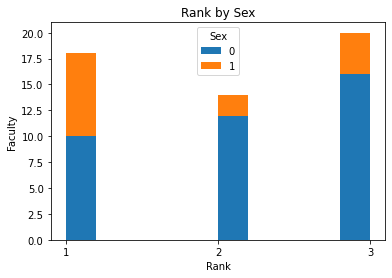

In [40]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist',  stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()